<a href="https://colab.research.google.com/github/Chinmay-03/Computer_Graphics_lab/blob/main/DigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install idx2numpy
!pip3 install tensorflow
!pip3 install keras

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=c5ab0b48b0afee46c0a64aa5bf697aa75d198179be6033bc4ac7c9976d8cba51
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [2]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
import idx2numpy
import gzip

# Decompress the files
def decompress_file(filename):
  with gzip.open(filename, 'rb') as gz_file:
    with open(filename[:-3], 'wb') as decompressed_file:
      decompressed_file.write(gz_file.read())

decompress_file('/content/train-images-idx3-ubyte.gz')
decompress_file('/content/train-labels-idx1-ubyte.gz')
decompress_file('/content/t10k-images-idx3-ubyte.gz')
decompress_file('/content/t10k-labels-idx1-ubyte.gz')

# Now load the decompressed files
train_images_original = idx2numpy.convert_from_file('/content/train-images-idx3-ubyte')
train_labels_original = idx2numpy.convert_from_file('/content/train-labels-idx1-ubyte')

test_images_original = idx2numpy.convert_from_file('/content/t10k-images-idx3-ubyte')
test_labels_original = idx2numpy.convert_from_file('/content/t10k-labels-idx1-ubyte')

In [6]:
#@title **Dimensions of Original Datasets**

print("Training images dataset shape: ", train_images_original.shape)
print("Training label shape", train_labels_original.shape)

print("\nTesting images dataset shape: ", test_images_original.shape)
print("Testing label shape: ", test_labels_original.shape)

Training images dataset shape:  (60000, 28, 28)
Training label shape (60000,)

Testing images dataset shape:  (10000, 28, 28)
Testing label shape:  (10000,)


In [7]:
#@title **Inverting grayscale and combining datasets**

train_images_inverted = 255 - train_images_original
test_images_inverted = 255 - test_images_original

#Combining inverted and original images into a single dataset
training_images = np.concatenate((train_images_original, train_images_inverted), axis = 0)
testing_images = np.concatenate((test_images_original, test_images_inverted), axis = 0)

training_labels = np.concatenate((train_labels_original, train_labels_original), axis = 0)
testing_labels = np.concatenate((test_labels_original, test_labels_original), axis = 0)

In [8]:
#@title **Dimensions of Updated Datasets**
print("Updated training dataset dimensions: ")
print(f"Training images : {training_images.shape}")
print(f"Training labels : {training_labels.shape}")

print("\nUpdates testing dataset dimensions: ")
print(f"Testing images : {training_images.shape}")
print(f"Testing labels : {training_labels.shape}")

Updated training dataset dimensions: 
Training images : (120000, 28, 28)
Training labels : (120000,)

Updates testing dataset dimensions: 
Testing images : (120000, 28, 28)
Testing labels : (120000,)


In [9]:
#@title **Normalizing Values**
training_images, testing_images = training_images/255.0, testing_images/255.0

print("Training set normalized: ")
print(training_images[0].shape)
print(training_images[0])

print("\n\nTesting set normalized: ")
print(testing_images[0].shape)
print(testing_images[0])

Training set normalized: 
(28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

Training Label:  5


Testing label:  3


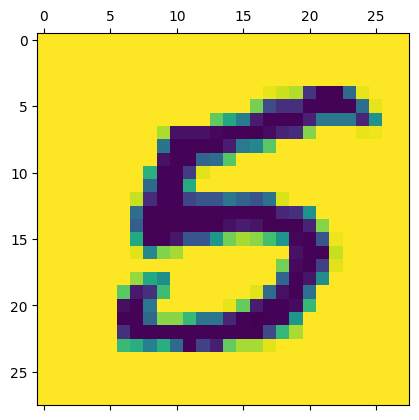

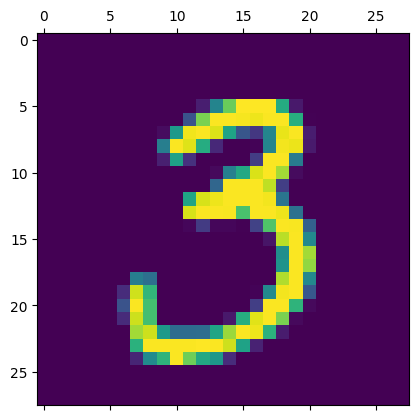

In [10]:
#@title **Visualizing Training and Testing Dataset**

print("Training Label: ", training_labels[80000])
plt.matshow(training_images[80000])

print("\n\nTesting label: ", testing_labels[90])
plt.matshow(testing_images[90])


In [11]:
#@title **Building a CNN Model**

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [12]:
#@title **Adding Channel Dimension**

training_images = training_images[..., np.newaxis]
testing_images = testing_images[..., np.newaxis]

In [13]:
print(training_images.shape)
print(testing_images.shape)

(120000, 28, 28, 1)
(20000, 28, 28, 1)


In [14]:
# Train the model
model.fit(training_images, training_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
1688/1688 [==============================] - 118s 69ms/step - loss: 0.5205 - accuracy: 0.8325 - val_loss: 0.1254 - val_accuracy: 0.9617
Epoch 2/5
1688/1688 [==============================] - 116s 69ms/step - loss: 0.1838 - accuracy: 0.9467 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 3/5
1688/1688 [==============================] - 115s 68ms/step - loss: 0.1381 - accuracy: 0.9607 - val_loss: 0.0982 - val_accuracy: 0.9713
Epoch 4/5
1688/1688 [==============================] - 120s 71ms/step - loss: 0.1158 - accuracy: 0.9675 - val_loss: 0.0838 - val_accuracy: 0.9741
Epoch 5/5
625/625 [==============================] - 6s 10ms/step - loss: 0.0643 - accuracy: 0.9811
Test accuracy: 0.9811499714851379


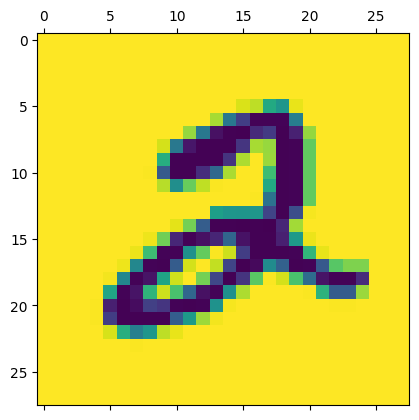

In [17]:
img = load_img('/content/digit-2.png', target_size=(28, 28), color_mode='grayscale')
img_array = img_to_array(img)
plt.matshow(img_array)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)


In [18]:
prediction = model.predict(img_array)

print("\nPrediction array: \n", prediction)
print("\nPrediction array shape: ",prediction.shape)


print("\nModel Prediction: ", np.argmax(prediction[0]))

1/1 [==============================] - 0s 132ms/step

Prediction array: 
 [[7.9697887e-11 5.2562047e-08 9.9999905e-01 5.4731964e-07 2.8087602e-10
  1.4538605e-12 2.0007528e-13 2.4454619e-07 1.0246298e-07 4.7598812e-13]]

Prediction array shape:  (1, 10)

Model Prediction:  2


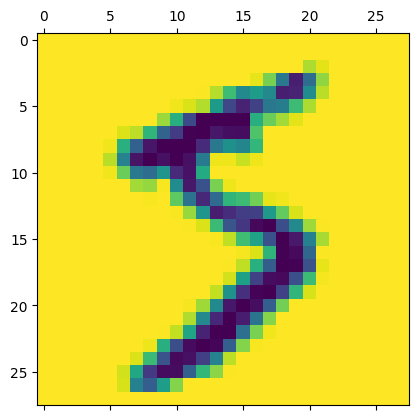

In [19]:
img = load_img('/content/digit-5.png', target_size=(28, 28), color_mode='grayscale')
img_array = img_to_array(img)
plt.matshow(img_array)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)


In [20]:
prediction = model.predict(img_array)

print("\nPrediction array: \n", prediction)
print("\nPrediction array shape: ",prediction.shape)


print("\nModel Prediction: ", np.argmax(prediction[0]))

1/1 [==============================] - 0s 22ms/step

Prediction array: 
 [[1.1272372e-04 2.2179383e-04 4.9383543e-04 3.6790830e-01 2.0654883e-05
  6.2332511e-01 1.8862851e-03 3.8241337e-06 4.1097263e-03 1.9177657e-03]]

Prediction array shape:  (1, 10)

Model Prediction:  5
